> <b>Customer Churn Analysis </b>

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Dataset: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset#bigml_59c28831336c6604c800002a.csv

<b>Importing Necessary Libraries</b>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [10]:
file=("bigml_59c28831336c6604c800002a.csv")
customer= pd.read_csv(file)
customer.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
customer.shape

(3333, 21)

<b>Observation:</b>
There are 3333 rows and 21 columns in the dataset.

In [12]:
customer.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [13]:
numerical_data= customer.select_dtypes(include=["int64"])
numerical_data.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')

<b>Observation:</b>
There are 8 attributes which are having int datatype.

In [14]:
float_data= customer.select_dtypes(include=["float"])
float_data.columns

Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')

<b>Observation:</b>
There are 8 attributes which are having float datatype.

In [15]:
object_data =customer.select_dtypes(include=["object"])
object_data.columns

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

<b>Observation:</b>
There are 4 attributes which are of object datatype.

In [16]:
bool_data =customer.select_dtypes(include=["bool"])
bool_data.columns

Index(['churn'], dtype='object')

<b>Observation:</b>
There is 1 attribute which is of bool datatype.

<b> Summary Statistics</b>

In [17]:
customer.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<b>Observations:</b>
<li> area code varies 408 to 510.</li>
<li> number vmail messages from 0 to 51.</li>
<li> total day minutes varies from 0 to 350.80.</li>
<li> total day calls varies from 0 to 165.</li>
<li> total day charge varies from 0 to 59.64.</li>
<li> total eve minutes varies from 0 to 363.70.</li>
<li> total eve calls varies from 0 to 170.</li>
<li> total eve charge varies from 0 to 30.91.</li>
<li> total night minutes varies from 33 to 175.</li>
<li> total night charge varies from 1 to 17.70.</li>
<li> total intl minutes varies from 0 to 20.</li>
<li> customer service calls varies from 0 to 9.</li>

<b>Checking the Missing Values</b>

In [18]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [19]:
customer.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

<b>Observation:</b>
There is no missing value in the dataset.

# Exploratory Data Analysis

<b>Uni-Variate Analysis</b>

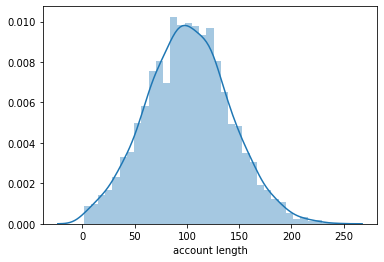

In [20]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(customer["account length"])
plt.show()

<b>Observation:</b>
The average account length is ~99.

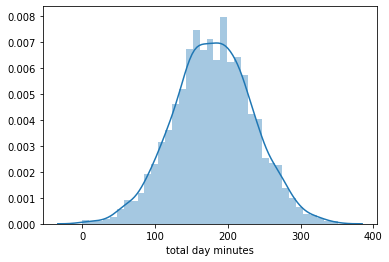

In [21]:
sns.distplot(customer["total day minutes"])
plt.show()

<b>Observation:</b>
The average total day minutes is ~190.

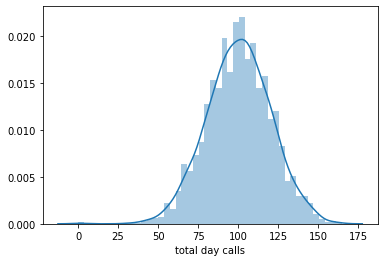

In [22]:
sns.distplot(customer["total day calls"])
plt.show()

<b>Observation:</b>
The average total day calls is ~105.

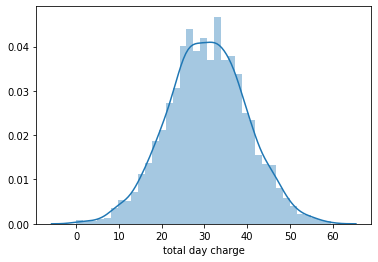

In [23]:
sns.distplot(customer["total day charge"])
plt.show()

<b>Observation:</b>
The average total day charge is ~35.

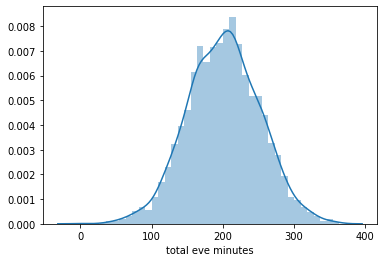

In [24]:
sns.distplot(customer["total eve minutes"])
plt.show()

<b>Obseravtion:</b>
The average total eve minutes is 200.

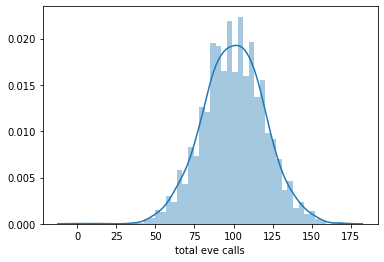

In [25]:
sns.distplot(customer["total eve calls"])
plt.show()

<b> Observation:</b>
The average total eve calls is ~105.

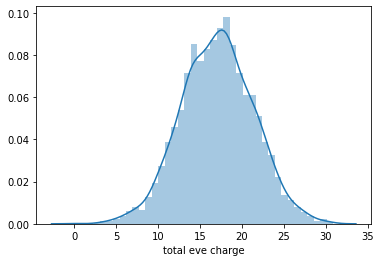

In [26]:
sns.distplot(customer["total eve charge"])
plt.show()

<b>Observation:</b>
The average total eve charge is 18.

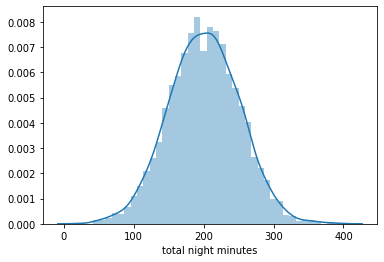

In [27]:
sns.distplot(customer["total night minutes"])
plt.show()

<b>Observation:</b>
The average total night minutes is 200.

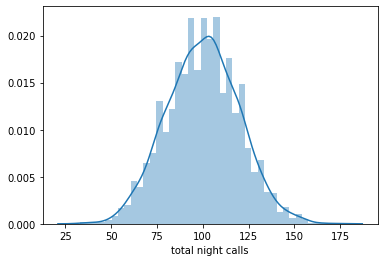

In [28]:
sns.distplot(customer["total night calls"])
plt.show()

<b>Observation:</b>
The average total night calls is 100.

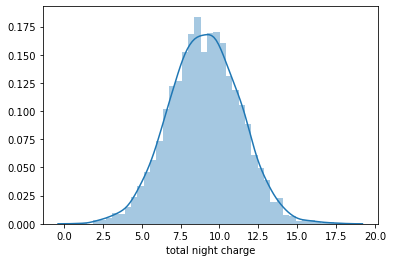

In [29]:
sns.distplot(customer["total night charge"])
plt.show()

<b>Observation:</b>
The average total night charge is 9.

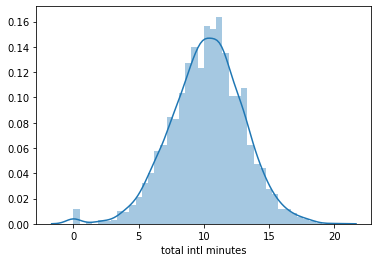

In [30]:
sns.distplot(customer["total intl minutes"])
plt.show()

<b>Observation:</b>
The average total intl minutes is 12.

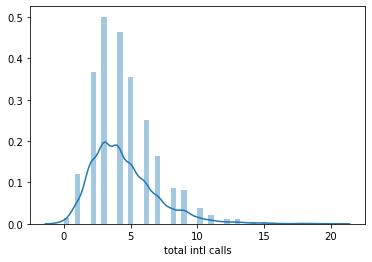

In [31]:
sns.distplot(customer["total intl calls"])
plt.show()

<b>Observation:</b>
The average total intl calls is 2.5.

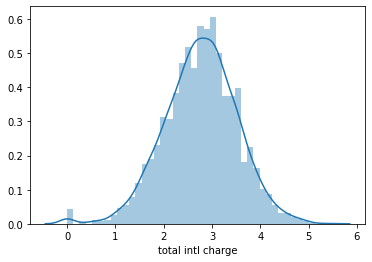

In [32]:
sns.distplot(customer["total intl charge"])
plt.show()

<b>Observation:</b>
The average total intl charge is 3.

<b>Bi-Variate Analysis</b>

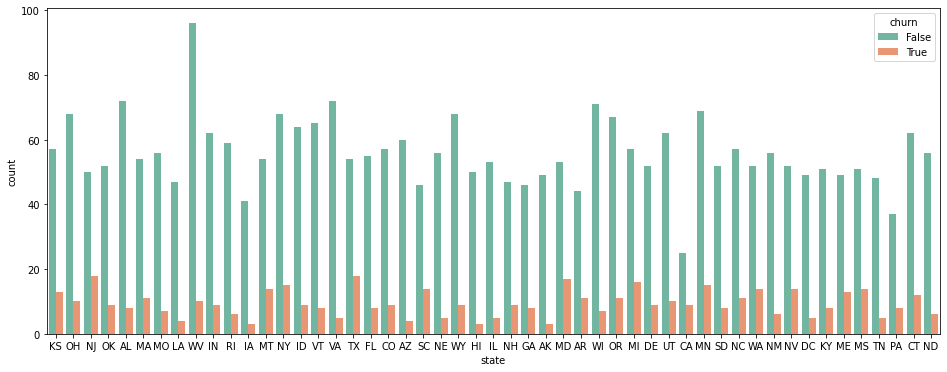

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(x="state",hue="churn",data=customer,palette="Set2")
plt.show()

<b>Observations:</b>
<li> IA has lower chance of getting churn.</li>
<li> states (NJ, TX and MD) has high chance of churn as compare to other states.</li>

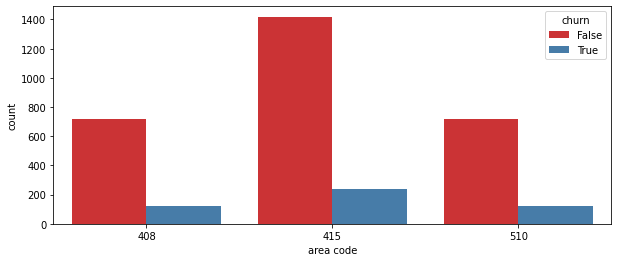

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x="area code",hue="churn",data=customer,palette="Set1")
plt.show()

<b>Observation:</b>
The area code(408) has lower chance of getting churn.

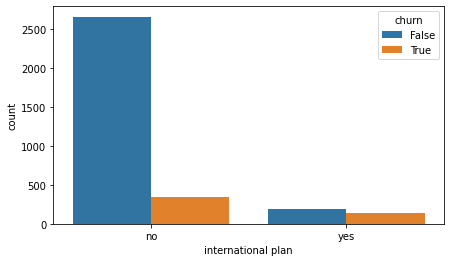

In [35]:
plt.figure(figsize=(7,4))
sns.countplot(x="international plan",hue="churn",data=customer)
plt.show()

<b>Observation:</b>
The customer who has an international plan has a lower chance of churn.

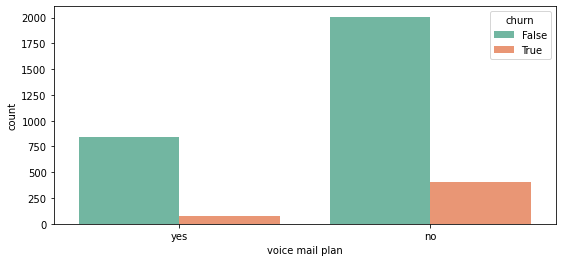

In [36]:
plt.figure(figsize=(9,4))
sns.countplot(x="voice mail plan",hue="churn",data=customer,palette="Set2")
plt.show()

<b>Observation:</b>
The subscriber who has a voice mail plan has a lower chance of getting churn.

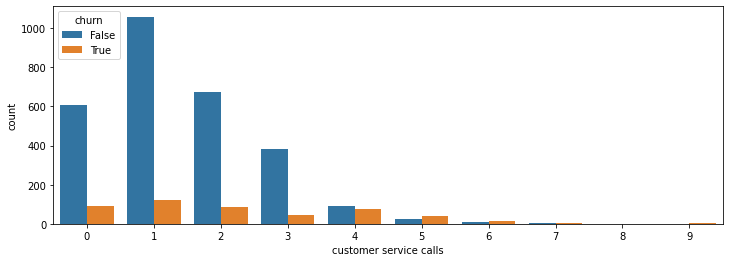

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x="customer service calls",hue="churn",data=customer)
plt.show()

<b>Observation:</b>
Subscribers who have called more than 5 service calls have a lower chance of churn.

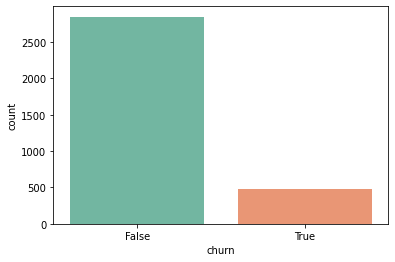

In [38]:
sns.countplot(customer["churn"],palette="Set2")
plt.show()

<b>Observation:</b>
In the target variable(churn) it seems that data is unbalanced. 

<b>Multi-Variate Analysis</b>

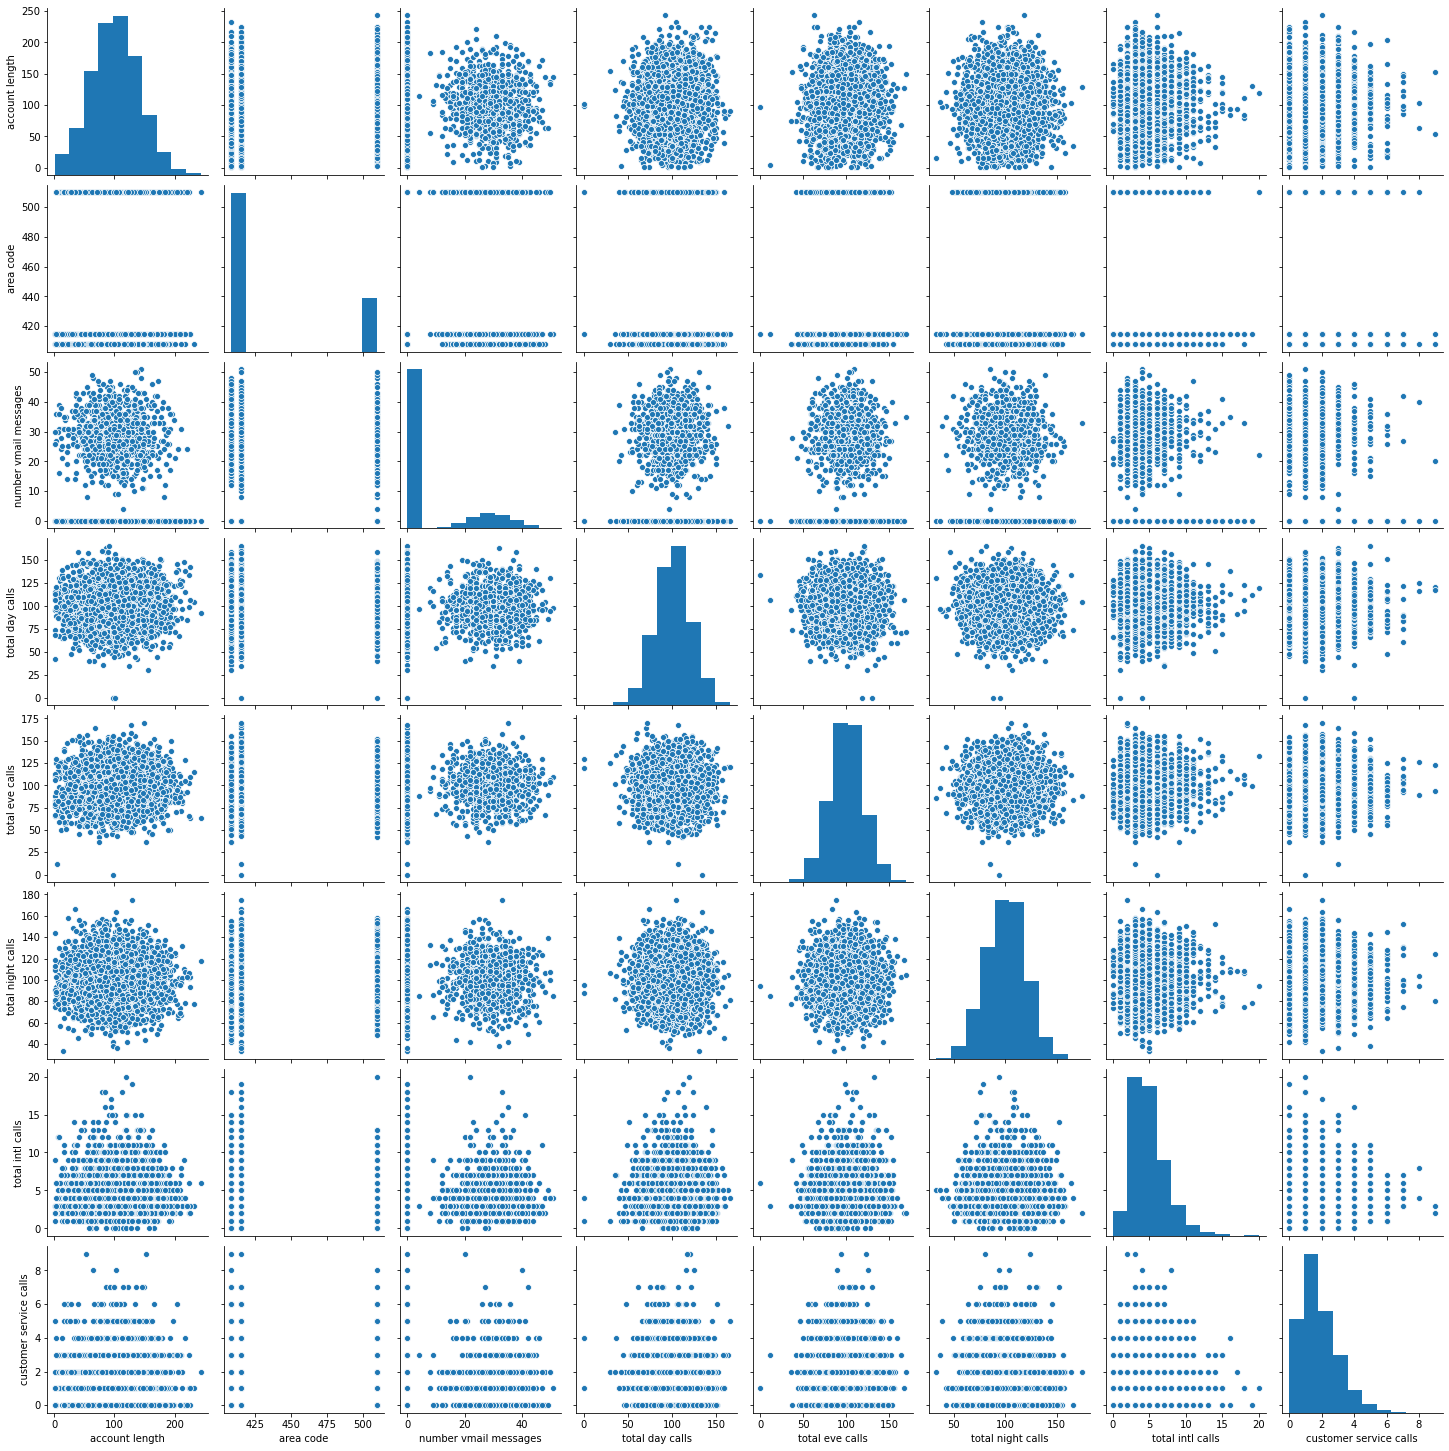

In [39]:
sns.pairplot(numerical_data)
plt.show()

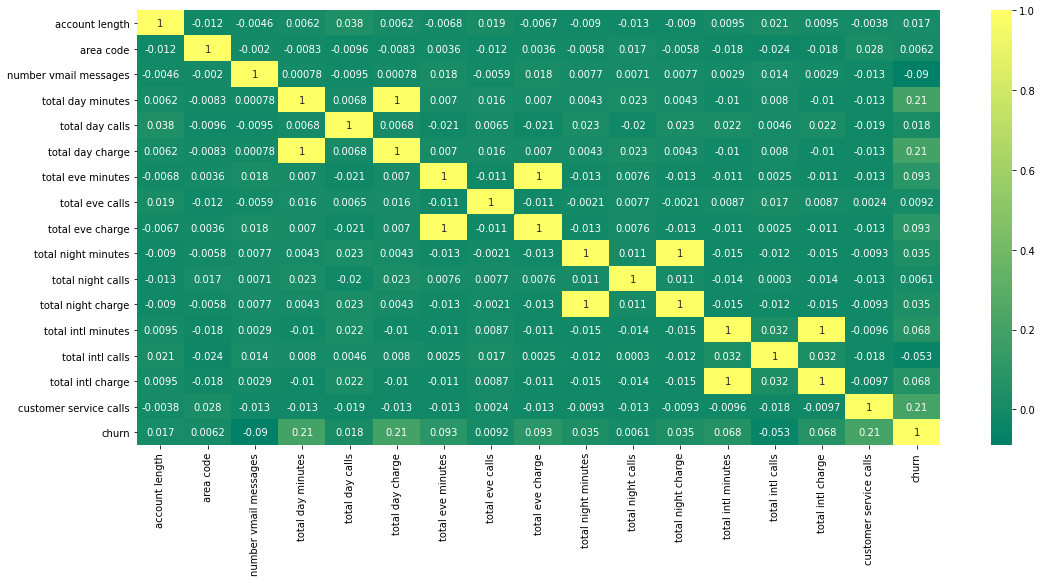

In [40]:
plt.figure(figsize=(18,8))
sns.heatmap(customer.corr(), cmap="summer",annot=True)
plt.show()

<b>Observation:</b>
There is multicollinearity between total day minutes and total day charge. Removing total day minutes to increase the model accuracy.

In [0]:
# Removing one attribute(total day minutes) from dataset. As it has multicollinearity.
customer.drop(["total day minutes"],axis=1,inplace=True)

<b>Checking Skewness</b>

In [42]:
customer.skew(axis=0)

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

In [0]:
# Treating the skewness in the dataset
for index in customer.skew().index:
    if customer.skew().loc[index]>0.5:
        customer[index]=np.log1p(customer[index])

In [44]:
customer.skew(axis=0)

account length            0.096606
area code                 1.122881
number vmail messages     1.028178
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls         -0.199368
total intl charge        -0.245287
customer service calls   -0.138568
churn                     2.018356
dtype: float64

<b>Converting the Categorical Variables</b>

In [0]:
# Lets encode the categorical attributes 
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
customer["churn"]=l.fit_transform(customer["churn"])
customer['state']= l.fit_transform(customer['state'])
customer['international plan']= l.fit_transform(customer['international plan'])
customer['phone number']=l.fit_transform(customer['phone number'])
customer['voice mail plan']= l.fit_transform(customer['voice mail plan'])

<b>Dividing the input and output variables</b>

In [0]:
X= customer.drop(["churn"],axis=1)
y= customer["churn"]

<b>Removing the Outliers</b>

In [47]:
from scipy.stats import zscore
z_score=abs(zscore(customer))
print("The shape of dataset before removing outliers",customer.shape)
customer=customer.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",customer.shape)

The shape of dataset before removing outliers (3333, 20)
The shape of dataset after removing outliers (2936, 20)


In [0]:
# Lets bring the dataset features into same scale
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into training and testing (70:30)

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [0]:
# We will use auc_roc score as the metrics 
from imblearn.over_sampling import SMOTE
def auc_roc_score(c,X,y):
    auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        c.fit(X_train,y_train)
        y_pred= c.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>auc_roc_score:
            auc_roc_score=auc_roc
            auc_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",auc_score," and it is :",round((auc_roc_score),2))

# Machine Learning Models:

As the target varible(churn) is binary, its a classification problem. We are implementing XG Boost Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, SVM Classifier and Logistic Regression.

<b>XG Boost Classifier</b>

In [52]:
model1 = XGBClassifier()
params={'min_child_weight': [1,5,7],'gamma': [0.5,1.5,2.5],"subsample":[0.4,0.8,1.0],"colsample_bytree":[0.6,0.8,1.0],'max_depth':[2,4,5]}
model1= GridSearchCV(model1, params, cv=5,scoring="roc_auc")
model1.fit(X,y)
model1.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 0.4}

In [53]:
model1 = XGBClassifier(colsample_bytree=0.6,gamma=0.5,max_depth=4,min_child_weight=1,subsample=0.4)
auc_roc_score(model1,X,y)

Maximum AUC_ROC Score corresponding to: 77  and it is : 0.88


In [54]:
pred_model1= model1.predict(X_test)
xg_model= model1.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((xg_model),2))

The accuracy of the XG Boost Model is: 0.96


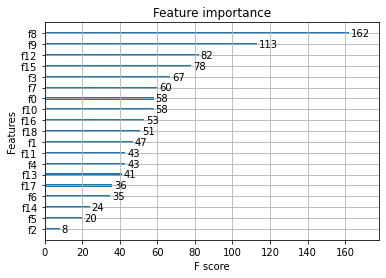

In [56]:
from xgboost import plot_importance
plot_importance(model1)
plt.show()

From the above visualization, we got two important features total day class and total day charge.

In [57]:
print(confusion_matrix(y_test,pred_model1))

[[841   4]
 [ 34 121]]


<b>Observations:</b>
<li> There are 841 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 121 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observation which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 34 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [58]:
print(classification_report(y_test,pred_model1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       845
           1       0.97      0.78      0.86       155

    accuracy                           0.96      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.96      0.96      0.96      1000



In [59]:
mean_c_xg_auc=cross_val_score(model1, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(model1, X,y,cv=5,scoring="roc_auc").mean())
std_c_xg_auc= cross_val_score(model1, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for XG Boost from mean AUC_ROC score is",cross_val_score(model1, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9242516729969253
standard deviation for XG Boost from mean AUC_ROC score is 0.028242784429607398


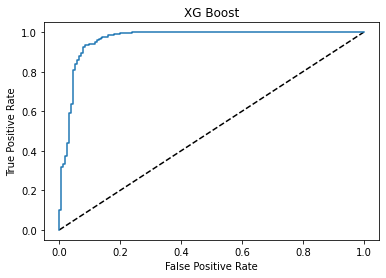

In [60]:
y_pred_prob= model1.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

In [61]:
model1_auc=roc_auc_score(y_test, model1.predict(X_test))
model1_auc

0.8879557167398359

<b>Decision Tree Classifier</b>

In [62]:
parameters= {'criterion':['gini', 'entropy'],'max_depth': [2,3,5,6]}
model2=DecisionTreeClassifier()
model2 = GridSearchCV(model2,parameters,cv=5)
model2.fit(X,y)
model2.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [63]:
model2=DecisionTreeClassifier(criterion='gini', max_depth=6)
auc_roc_score(model2,X,y)

Maximum AUC_ROC Score corresponding to: 68  and it is : 0.87


In [64]:
pred_model2=model2.predict(X_test)
dt_model2= model2.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dt_model2),2))

The accuracy of the Decision Tree Model is: 0.95


In [65]:
print(confusion_matrix(y_test,pred_model2))

[[836   9]
 [ 40 115]]


<b>Observations:</b>
<li> There are 836 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 115 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 9 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 40 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [66]:
print(classification_report(y_test,pred_model2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       845
           1       0.93      0.74      0.82       155

    accuracy                           0.95      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [67]:
mean_dt=cross_val_score(model2, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(model2, X,y,cv=5,scoring="roc_auc").mean())
s_dt= cross_val_score(model2, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(model2, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.8641201882498342
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.021935229189421753


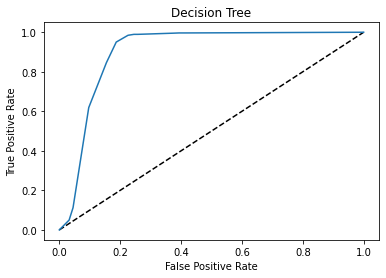

In [68]:
y_pred_prob= model2.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [69]:
dt_auc=roc_auc_score(y_test, model2.predict(X_test))
dt_auc

0.8656422981485016

<b>Random Forest Classifier</b>

In [70]:
model3= RandomForestClassifier()
parameters= {'n_estimators':[4,6,9],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,7],'min_samples_split':[3,5,9],'min_samples_leaf':[3,7,11]}
model3= GridSearchCV(model3,parameters)
model3.fit(X,y)
model3.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 6}

In [71]:
model3=RandomForestClassifier(criterion='entropy', max_depth=7,max_features='log2',min_samples_leaf=3,min_samples_split=9,n_estimators=6)
auc_roc_score(model3,X,y)

Maximum AUC_ROC Score corresponding to: 81  and it is : 0.84


In [72]:
pred_model3= model3.predict(X_test)
score_model3= model3.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((score_model3),3))

The accuracy of the Random Forest Classifier is: 0.931


In [73]:
print(confusion_matrix(y_test,pred_model3))

[[840   5]
 [ 64  91]]


<b>Observations:</b>
<li> There are 840 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 91 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 5 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 64 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [74]:
print(classification_report(y_test,pred_model3))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       845
           1       0.95      0.59      0.73       155

    accuracy                           0.93      1000
   macro avg       0.94      0.79      0.84      1000
weighted avg       0.93      0.93      0.92      1000



In [75]:
mean_rf_c=cross_val_score(model3, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(model3, X,y,cv=5,scoring="roc_auc").mean())
std_rf_c= cross_val_score(model3, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Random Forest Classifier from mean AUC_ROC score is",cross_val_score(model3, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9058366868632062
standard deviation for Random Forest Classifier from mean AUC_ROC score is 0.018686308876049513


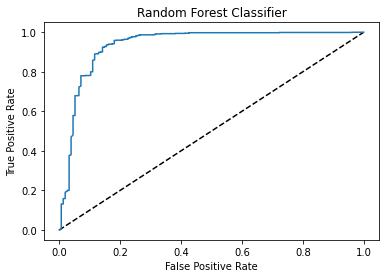

In [76]:
y_pred_prob= model3.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [77]:
model3_auc=roc_auc_score(y_test, model3.predict(X_test))
model3_auc

0.7905898072151173

<b>Gradient Boosting Classifier</b>

In [78]:
model4 = GradientBoostingClassifier()
parameters= {'learning_rate': [0.01,0.03,0.05,0.07], 'subsample': [0.1, 0.5,0.3,0.7], 'n_estimators': [10,50,100,500], 'max_depth': [2,4,8,10]}
model4= GridSearchCV(estimator=model4, param_grid= parameters, cv=5, n_jobs=-1)
model4.fit(X,y)
model4.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.7}

In [79]:
model4 = GradientBoostingClassifier(learning_rate=0.05,max_depth=8,n_estimators=500,subsample=0.7)
auc_roc_score(model4,X,y)

Maximum AUC_ROC Score corresponding to: 44  and it is : 0.9


In [80]:
pred_model4= model4.predict(X_test)
score_model4= model4.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((score_model4),3))

The accuracy of the Grading Boosting Model is: 0.978


In [81]:
importances=model4.feature_importances_
importances

array([0.01729106, 0.02156689, 0.0038511 , 0.03846308, 0.06830457,
       0.02365472, 0.03630272, 0.02667104, 0.24845056, 0.07638749,
       0.02364448, 0.06598449, 0.03167839, 0.01922299, 0.02956072,
       0.0609113 , 0.07212642, 0.03200672, 0.10392129])

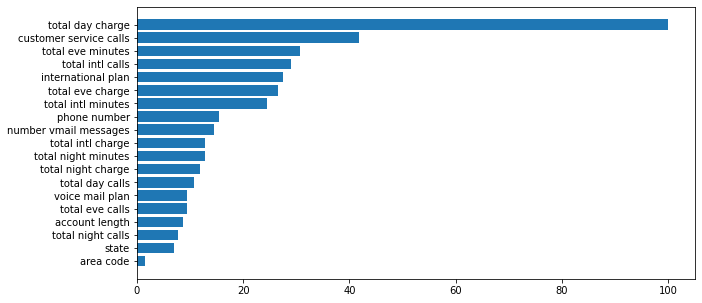

In [82]:
feature_importance= 100. * (importances/importances.max())
sorted_idx= np.argsort(importances)
pos= np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,5))
plt.barh(pos,feature_importance[sorted_idx],align="center")
plt.yticks(pos, customer.keys()[sorted_idx])
plt.show()

From the above visualization, total day charge is an important feature.

In [83]:
print(confusion_matrix(y_test,pred_model4))

[[841   4]
 [ 18 137]]


<b>Observations:</b>
<li> There are 841 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 137 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 18 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [84]:
print(classification_report(y_test,pred_model4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       845
           1       0.97      0.88      0.93       155

    accuracy                           0.98      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [85]:
mean_gb_c=cross_val_score(model4, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(model4, X,y,cv=5,scoring="roc_auc").mean())
std_gb_c= cross_val_score(model4, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(model4, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.9171128745403025
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.030707934596881217


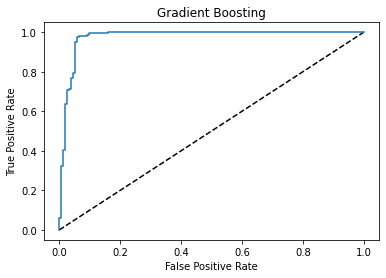

In [86]:
y_pred_prob= model4.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [87]:
model_auc4=roc_auc_score(y_test, model4.predict(X_test))
model_auc4

0.9395686199656422

<b>SVM Classifier</b>

In [88]:
model5=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
model5 = GridSearchCV(model5, parameters, cv=5,scoring="roc_auc")
model5.fit(X,y)
model5.best_params_

{'C': 1, 'kernel': 'rbf'}

In [89]:
model5=SVC(kernel="rbf",C=1,probability=True)
auc_roc_score(model5,X,y)

Maximum AUC_ROC Score corresponding to: 86  and it is : 0.73


In [90]:
pred_model5= model5.predict(X_test)
score_model5= model5.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((score_model5),2))

The accuracy of the SVM Model is: 0.93


In [91]:
print(confusion_matrix(y_test,pred_model5))

[[842   3]
 [ 70  85]]


<b>Observations:</b>
<li> There are 842 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 85 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 3 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 70 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [92]:
mean_sv_c=cross_val_score(model5, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(model5, X,y,cv=5,scoring="roc_auc").mean())
std_sv_c= cross_val_score(model5, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for SVM from mean AUC_ROC score is",cross_val_score(model5, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8909910622776873
standard deviation for SVM from mean AUC_ROC score is 0.02103107337504309


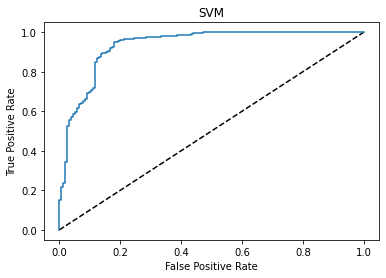

In [93]:
y_pred_prob= model5.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

In [94]:
model_ac5=roc_auc_score(y_test, model5.predict(X_test))
model_ac5

0.7724184004581027

<b>Logistic Regression</b>

In [95]:
model6=LogisticRegression()
param= {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
model6=GridSearchCV(model6,param,cv=10)
model6.fit(X,y)
model6.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [97]:
model6=LogisticRegression(C=1.0,penalty='l2')
auc_roc_score(model6,X,y)

Maximum AUC_ROC Score corresponding to: 61  and it is : 0.63


In [98]:
pred_model6 = model6.predict(X_test)
score_model6= model6.score(X_test, y_test)
print("The accuracy of the Logistic Regresion is", round((score_model6),2))

The accuracy of the Logistic Regresion is 0.85


In [99]:
print(confusion_matrix(y_test,pred_model6))

[[820  25]
 [121  34]]


<b>Observations:</b>
<li> There are 820 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 34 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 25 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 121 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [100]:
print(classification_report(y_test, pred_model6))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       845
           1       0.58      0.22      0.32       155

    accuracy                           0.85      1000
   macro avg       0.72      0.59      0.62      1000
weighted avg       0.83      0.85      0.83      1000



In [101]:
mean_log=cross_val_score(model6, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(model6, X,y,cv=5,scoring="roc_auc").mean())
std_log= cross_val_score(model6, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for logistic from mean AUC_ROC score is",cross_val_score(model6, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7889943931994935
standard deviation for logistic from mean AUC_ROC score is 0.026155084605456073


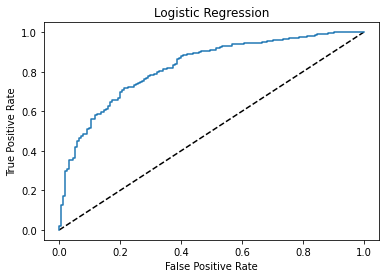

In [102]:
y_pred_prob= model6.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)
# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [103]:
lg_auc=roc_auc_score(y_test, model6.predict(X_test))
lg_auc

0.5948845199465546

# Evaluation:

In [104]:
#Lets initialise the data frame with columns model and f1_score
model_eval= [["XG Boost Classifier", xg_model,mean_c_xg_auc,std_c_xg_auc],["Decision Tree Classifier",dt_model2,mean_dt,s_dt],["Random Forest Classifier",score_model3, mean_rf_c,std_rf_c],["Gradient Boosting Classifier",score_model4, mean_gb_c,std_gb_c],["SVM Classifier",score_model5, mean_sv_c, std_sv_c],["Logistic Regression",score_model6, mean_log,std_log]]
compare= pd.DataFrame(model_eval, columns=["Model Name", "Accuracy","Mean AUC ROC Score"," Std from mean AUC ROC Score"], index=[1,2,3,4,5,6])
compare

,Model Name,Accuracy,Mean AUC ROC Score,Std from mean AUC ROC Score
1,XG Boost Classifier,0.962,0.924252,0.028243
2,Decision Tree Classifier,0.951,0.862948,0.023691
3,Random Forest Classifier,0.931,0.910658,0.026604
4,Gradient Boosting Classifier,0.978,0.915622,0.024547
5,SVM Classifier,0.927,0.890991,0.021031
6,Logistic Regression,0.854,0.788994,0.026155


<b>Observations:</b>
<li> From the above models, Gradient Boosting Classifier performed well with 97.8% accuracy.</li>
<li>As the data was imbalanced, we calculated Mean AUC ROC Score and Standard Deviation mean AUC ROC Score, our best performed model(Gradient Boosting Classifier) gives Mean AUC ROC score 0.915622 and Standard Deviation mean AUC ROC score is 0.0294547.</li>

<b>Saving the Prediction</b>

In [0]:
np.savetxt('Model20.csv',pred_model4,delimiter=',')

In [106]:
#Lets save the best model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model4, 'Project20.pkl')

['Project20.pkl']